In [1]:
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
import numpy as np
from transformers import BertModel, BertTokenizer
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers.data.metrics import simple_accuracy
from tqdm import tqdm
from transformers import RobertaForSequenceClassification, AutoTokenizer
import numpy as np 
from matplotlib import pyplot as plt 

In [49]:
# Prepare mrpc dataset
dataset = load_dataset('glue', 'mrpc', split='validation')
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)

model = BertModel.from_pretrained('bert-base-uncased')
torch.save(model.state_dict(), 'model_weights.pth')


Reusing dataset glue (/home/jjc/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [50]:
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [51]:
para={}
for name,parameters in model.named_parameters():
    print(name,':',parameters.size())
    para[name]=parameters.detach().numpy()

embeddings.word_embeddings.weight : torch.Size([30522, 768])
embeddings.position_embeddings.weight : torch.Size([512, 768])
embeddings.token_type_embeddings.weight : torch.Size([2, 768])
embeddings.LayerNorm.weight : torch.Size([768])
embeddings.LayerNorm.bias : torch.Size([768])
encoder.layer.0.attention.self.query.weight : torch.Size([768, 768])
encoder.layer.0.attention.self.query.bias : torch.Size([768])
encoder.layer.0.attention.self.key.weight : torch.Size([768, 768])
encoder.layer.0.attention.self.key.bias : torch.Size([768])
encoder.layer.0.attention.self.value.weight : torch.Size([768, 768])
encoder.layer.0.attention.self.value.bias : torch.Size([768])
encoder.layer.0.attention.output.dense.weight : torch.Size([768, 768])
encoder.layer.0.attention.output.dense.bias : torch.Size([768])
encoder.layer.0.attention.output.LayerNorm.weight : torch.Size([768])
encoder.layer.0.attention.output.LayerNorm.bias : torch.Size([768])
encoder.layer.0.intermediate.dense.weight : torch.Size([3

In [64]:
w1 = para['embeddings.word_embeddings.weight'].flatten()
w2 = para['embeddings.position_embeddings.weight'].flatten()
w3 = para['embeddings.token_type_embeddings.weight'].flatten()
w4 = para['embeddings.LayerNorm.weight'].flatten()
w5 = para['encoder.layer.0.attention.self.query.weight'].flatten()
w6 = para['encoder.layer.0.attention.self.key.weight'].flatten()
w7 = para['encoder.layer.0.attention.self.value.weight'].flatten()
w8 = para['encoder.layer.0.attention.output.dense.weight'].flatten()
w9 = para['encoder.layer.0.attention.output.LayerNorm.weight'].flatten()
w10 = para['encoder.layer.0.intermediate.dense.weight'].flatten()
w11 = para['encoder.layer.0.output.dense.weight'].flatten()
w12 = para['encoder.layer.0.output.LayerNorm.weight'].flatten()
layer1 = np.concatenate((w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12))
layer1.shape
w13 = para['encoder.layer.1.attention.self.query.weight'].flatten()
w14 = para['encoder.layer.1.attention.self.key.weight'].flatten()
w15 = para['encoder.layer.1.attention.self.value.weight'].flatten()
w16 = para['encoder.layer.1.attention.output.dense.weight'].flatten()
w17 = para['encoder.layer.1.attention.output.LayerNorm.weight'].flatten()
w18 = para['encoder.layer.1.intermediate.dense.weight'].flatten()
w19 = para['encoder.layer.1.output.dense.weight'].flatten()
w20 = para['encoder.layer.1.output.LayerNorm.weight'].flatten()
layer2 = np.concatenate((w13,w14,w15,w16,w17,w18,w19,w20))
layer2.shape
w21 = para['encoder.layer.2.attention.self.query.weight'].flatten()
w22 = para['encoder.layer.2.attention.self.key.weight'].flatten()
w23 = para['encoder.layer.2.attention.self.value.weight'].flatten()
w24 = para['encoder.layer.2.attention.output.dense.weight'].flatten()
w25 = para['encoder.layer.2.attention.output.LayerNorm.weight'].flatten()
w26 = para['encoder.layer.2.intermediate.dense.weight'].flatten()
w27 = para['encoder.layer.2.output.dense.weight'].flatten()
w28 = para['encoder.layer.2.output.LayerNorm.weight'].flatten()
layer3 = np.concatenate((w21,w22,w23,w24,w25,w26,w27,w28))
layer3.shape
w29 = para['encoder.layer.3.attention.self.query.weight'].flatten()
w30 = para['encoder.layer.3.attention.self.key.weight'].flatten()
w31 = para['encoder.layer.3.attention.self.value.weight'].flatten()
w32 = para['encoder.layer.3.attention.output.dense.weight'].flatten()
w33 = para['encoder.layer.3.attention.output.LayerNorm.weight'].flatten()
w34 = para['encoder.layer.3.intermediate.dense.weight'].flatten()
w35 = para['encoder.layer.3.output.dense.weight'].flatten()
w36 = para['encoder.layer.3.output.LayerNorm.weight'].flatten()
layer4 = np.concatenate((w29,w30,w31,w32,w33,w34,w35,w36))
layer4.shape
w37 = para['encoder.layer.4.attention.self.query.weight'].flatten()
w38 = para['encoder.layer.4.attention.self.key.weight'].flatten()
w39 = para['encoder.layer.4.attention.self.value.weight'].flatten()
w40 = para['encoder.layer.4.attention.output.dense.weight'].flatten()
w41 = para['encoder.layer.4.attention.output.LayerNorm.weight'].flatten()
w42 = para['encoder.layer.4.intermediate.dense.weight'].flatten()
w43 = para['encoder.layer.4.output.dense.weight'].flatten()
w44 = para['encoder.layer.4.output.LayerNorm.weight'].flatten()
layer5 = np.concatenate((w37,w38,w39,w40,w41,w42,w43,w44))
layer5.shape
encoder5_w1 = para['encoder.layer.5.attention.self.query.weight'].flatten()
encoder5_w2 = para['encoder.layer.5.attention.self.key.weight'].flatten()
encoder5_w3 = para['encoder.layer.5.attention.self.value.weight'].flatten()
encoder5_w4 = para['encoder.layer.5.attention.output.dense.weight'].flatten()
encoder5_w5 = para['encoder.layer.5.attention.output.LayerNorm.weight'].flatten()
encoder5_w6 = para['encoder.layer.5.intermediate.dense.weight'].flatten()
encoder5_w7 = para['encoder.layer.5.output.dense.weight'].flatten()
encoder5_w8 = para['encoder.layer.5.output.LayerNorm.weight'].flatten()
layer6 = np.concatenate((encoder5_w1,encoder5_w2,encoder5_w3,encoder5_w4,encoder5_w5,encoder5_w6,encoder5_w7,encoder5_w8))
layer6.shape
w45 = para['encoder.layer.6.attention.self.query.weight'].flatten()
w46 = para['encoder.layer.6.attention.self.key.weight'].flatten()
w47 = para['encoder.layer.6.attention.self.value.weight'].flatten()
w48 = para['encoder.layer.6.attention.output.dense.weight'].flatten()
w49 = para['encoder.layer.6.attention.output.LayerNorm.weight'].flatten()
w50 = para['encoder.layer.6.intermediate.dense.weight'].flatten()
w51 = para['encoder.layer.6.output.dense.weight'].flatten()
w52 = para['encoder.layer.6.output.LayerNorm.weight'].flatten()
layer7 = np.concatenate((w45,w46,w47,w48,w49,w50,w51,w52))
layer7.shape
w53 = para['encoder.layer.7.attention.self.query.weight'].flatten()
w54 = para['encoder.layer.7.attention.self.key.weight'].flatten()
w55 = para['encoder.layer.7.attention.self.value.weight'].flatten()
w56 = para['encoder.layer.7.attention.output.dense.weight'].flatten()
w57 = para['encoder.layer.7.attention.output.LayerNorm.weight'].flatten()
w58 = para['encoder.layer.7.intermediate.dense.weight'].flatten()
w59 = para['encoder.layer.7.output.dense.weight'].flatten()
w60 = para['encoder.layer.7.output.LayerNorm.weight'].flatten()
layer8 = np.concatenate((w53,w54,w55,w56,w57,w58,w59,w60))
layer8.shape
w61 = para['encoder.layer.8.attention.self.query.weight'].flatten()
w62 = para['encoder.layer.8.attention.self.key.weight'].flatten()
w63 = para['encoder.layer.8.attention.self.value.weight'].flatten()
w64 = para['encoder.layer.8.attention.output.dense.weight'].flatten()
w65 = para['encoder.layer.8.attention.output.LayerNorm.weight'].flatten()
w66 = para['encoder.layer.8.intermediate.dense.weight'].flatten()
w67 = para['encoder.layer.8.output.dense.weight'].flatten()
w68 = para['encoder.layer.8.output.LayerNorm.weight'].flatten()
layer9 = np.concatenate((w61,w62,w63,w64,w65,w66,w67,w68))
layer9.shape
w69 = para['encoder.layer.9.attention.self.query.weight'].flatten()
w70 = para['encoder.layer.9.attention.self.key.weight'].flatten()
w71 = para['encoder.layer.9.attention.self.value.weight'].flatten()
w72 = para['encoder.layer.9.attention.output.dense.weight'].flatten()
w73 = para['encoder.layer.9.attention.output.LayerNorm.weight'].flatten()
w74 = para['encoder.layer.9.intermediate.dense.weight'].flatten()
w75 = para['encoder.layer.9.output.dense.weight'].flatten()
w76 = para['encoder.layer.9.output.LayerNorm.weight'].flatten()
layer10 = np.concatenate((w69,w70,w71,w72,w73,w74,w75,w76))
layer10.shape
w77 = para['encoder.layer.10.attention.self.query.weight'].flatten()
w78 = para['encoder.layer.10.attention.self.key.weight'].flatten()
w79 = para['encoder.layer.10.attention.self.value.weight'].flatten()
w80 = para['encoder.layer.10.attention.output.dense.weight'].flatten()
w81 = para['encoder.layer.10.attention.output.LayerNorm.weight'].flatten()
w82 = para['encoder.layer.10.intermediate.dense.weight'].flatten()
w83 = para['encoder.layer.10.output.dense.weight'].flatten()
w84 = para['encoder.layer.10.output.LayerNorm.weight'].flatten()
layer11 = np.concatenate((w77,w78,w79,w80,w81,w82,w83,w84))
layer11.shape
w85 = para['encoder.layer.11.attention.self.query.weight'].flatten()
w86 = para['encoder.layer.11.attention.self.key.weight'].flatten()
w87 = para['encoder.layer.11.attention.self.value.weight'].flatten()
w88 = para['encoder.layer.11.attention.output.dense.weight'].flatten()
w89 = para['encoder.layer.11.attention.output.LayerNorm.weight'].flatten()
w90 = para['encoder.layer.11.intermediate.dense.weight'].flatten()
w91 = para['encoder.layer.11.output.dense.weight'].flatten()
w92 = para['encoder.layer.11.output.LayerNorm.weight'].flatten()
layer12 = np.concatenate((w85,w86,w87,w88,w89,w90,w91,w92))
layer12.shape
w93 = para['pooler.dense.weight'].flatten()
bert_total = np.concatenate((layer1,layer2,layer3,layer4,layer5,layer6,layer7,layer8,layer9,layer10,layer11,layer12,w93))


In [65]:
bert_total.shape

(109379328,)

Text(0.5, 1.0, 'BERT Weight distribution')

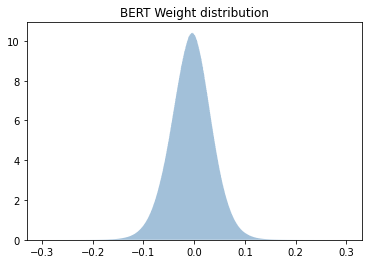

In [81]:
plt.hist(bert_total, bins=1000, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none', range=(-0.3,0.3));
plt.title("BERT Weight distribution")

Text(0.5, 1.0, 'BERT Layer1 Weight distribution')

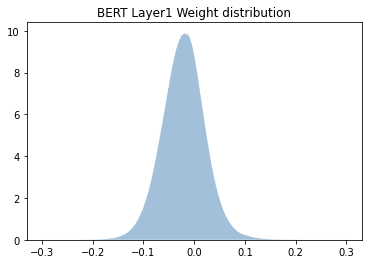

In [79]:
plt.hist(layer1, bins=1000, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none', range=(-0.3,0.3));
plt.title("BERT Layer1 Weight distribution")

In [14]:
import torchvision.models as models
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

In [15]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
para={}
for name,parameters in model.named_parameters():
    print(name,':',parameters.size())
    para[name]=parameters.detach().numpy()

features.0.weight : torch.Size([64, 3, 3, 3])
features.0.bias : torch.Size([64])
features.2.weight : torch.Size([64, 64, 3, 3])
features.2.bias : torch.Size([64])
features.5.weight : torch.Size([128, 64, 3, 3])
features.5.bias : torch.Size([128])
features.7.weight : torch.Size([128, 128, 3, 3])
features.7.bias : torch.Size([128])
features.10.weight : torch.Size([256, 128, 3, 3])
features.10.bias : torch.Size([256])
features.12.weight : torch.Size([256, 256, 3, 3])
features.12.bias : torch.Size([256])
features.14.weight : torch.Size([256, 256, 3, 3])
features.14.bias : torch.Size([256])
features.17.weight : torch.Size([512, 256, 3, 3])
features.17.bias : torch.Size([512])
features.19.weight : torch.Size([512, 512, 3, 3])
features.19.bias : torch.Size([512])
features.21.weight : torch.Size([512, 512, 3, 3])
features.21.bias : torch.Size([512])
features.24.weight : torch.Size([512, 512, 3, 3])
features.24.bias : torch.Size([512])
features.26.weight : torch.Size([512, 512, 3, 3])
features.

In [32]:
w1 = para['features.0.weight'].flatten()
w2 = para['features.2.weight'].flatten()
w3 = para['features.5.weight'].flatten()
w4 = para['features.7.weight'].flatten()
w5 = para['features.10.weight'].flatten()
w6 = para['features.12.weight'].flatten()
w7 = para['features.14.weight'].flatten()
w8 = para['features.17.weight'].flatten()
w9 = para['features.19.weight'].flatten()
w10 = para['features.21.weight'].flatten()
w11 = para['features.24.weight'].flatten()
w12 = para['features.26.weight'].flatten()
w13 = para['features.28.weight'].flatten()
w14 = para['classifier.0.weight'].flatten()
w15 = para['classifier.3.weight'].flatten()
w16 = para['classifier.6.weight'].flatten()


(1728,)
(36864,)


In [46]:
total = np.concatenate((w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16))
total.shape

(138344128,)

Text(0.5, 1.0, 'VGG16 Weight distribution')

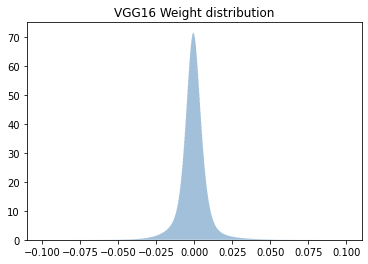

In [48]:

plt.hist(total, bins=1000, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none', range=(-0.1,0.1));
plt.title("VGG16 Weight distribution")

(array([2.46496043e-07, 1.23248022e-07, 0.00000000e+00, 2.46496544e-07,
        1.23247896e-07, 1.23248147e-07, 1.23248022e-07, 2.46496043e-07,
        1.23248022e-07, 8.62736151e-07, 7.39488881e-07, 1.60222428e-06,
        1.47897626e-06, 2.58820977e-06, 4.19043486e-06, 8.25761744e-06,
        1.39270264e-05, 3.58651925e-05, 1.31505672e-04, 7.97045158e-04,
        2.95062001e-02, 1.66126460e+01, 4.03998490e-01, 3.08021534e-03,
        2.96658063e-04, 6.88956615e-05, 2.07056781e-05, 1.13388180e-05,
        6.03915305e-06, 3.32769827e-06, 2.58820977e-06, 1.10923219e-06,
        1.23248022e-06, 8.62736151e-07, 4.92992587e-07, 3.69744065e-07,
        2.46496043e-07, 1.23248147e-07, 0.00000000e+00, 1.23248022e-07]),
 array([-1.2725645 , -1.2139157 , -1.1552669 , -1.096618  , -1.0379694 ,
        -0.97932047, -0.9206717 , -0.8620229 , -0.80337405, -0.7447252 ,
        -0.6860764 , -0.62742764, -0.5687788 , -0.51013   , -0.4514812 ,
        -0.3928324 , -0.33418357, -0.27553475, -0.21688595,

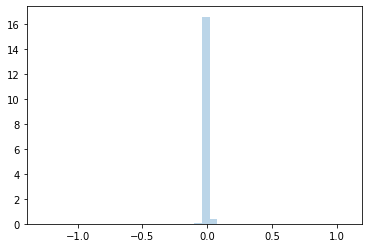

In [40]:
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(total, **kwargs)
